## Алиева Хадижат ПИ20-1. Лабораторная работа 6.2. Понижение размерности для визуализации данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

1. Загрузите прилагающийся датасет credit_data

In [2]:
data = pd.read_csv("credit_data.csv")
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


2. Проверьте датасет на наличие текстовых атрибутов. Замените текстовые атрибуты на числовые без потери качества данных

In [3]:
data.dtypes

Unnamed: 0           int64
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

In [4]:
target = data['Risk']
new_data = data.drop(['Risk','Unnamed: 0', 'Purpose'], axis = 1)

new_data['Saving accounts'] = new_data['Saving accounts'].map({"little" : 1, "moderate" : 2, "quite rich" : 3, "rich" : 4});
new_data['Checking account'] = new_data['Checking account'].map({"little" : 1, "moderate" : 2, "rich" : 3});
target = target.map({"good" : 1, "bad" : 0});
new_data['Saving accounts'] = new_data['Saving accounts'].fillna(0)
new_data['Checking account'] = new_data['Checking account'].fillna(0)
new_data = pd.get_dummies(new_data)
new_data.head()

,Age,Job,Saving accounts,Checking account,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent
0,67,2,0.0,1.0,1169,6,0,1,0,1,0
1,22,2,1.0,2.0,5951,48,1,0,0,1,0
2,49,1,1.0,0.0,2096,12,0,1,0,1,0
3,45,2,1.0,1.0,7882,42,0,1,1,0,0
4,53,2,1.0,1.0,4870,24,0,1,1,0,0


3. Выведите информацию о количественных параметрах датасета

In [5]:
data.shape

(1000, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [7]:
data.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


4. Разделите эти данные на тестовую и обучающую выборки

In [8]:
x_train, x_test, y_train, y_test = train_test_split(new_data, target, test_size = 0.2, random_state = True)

5. Обучите модель случайных лесов на обучающей выборке. Проверьте точность предсказаний

In [9]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

classifier = RandomForestClassifier(max_depth = 10, random_state = 0)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

6. Оцените полученную модель с помощью метрик

In [10]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy:', accuracy_score(y_test, y_pred))

[[ 24  35]
 [ 17 124]]
Accuracy: 0.74


7. Понизьте размерность данных с помощью метода главных компонент

In [11]:
pca_1 = PCA(n_components = 2)
x_train_c1 = pca_1.fit_transform(x_train)
x_test_c1 = pca_1.transform(x_test)

8. Обучите заново модель случайных лесов и оцените ее эффективность с помощью метрик

In [12]:
classifier = RandomForestClassifier(max_depth = 2, random_state=0)
classifier.fit(x_train_c1, y_train)

y_pred_c1 = classifier.predict(x_test_c1)

cm = confusion_matrix(y_test, y_pred_c1)
print(cm)
print('Accuracy:', accuracy_score(y_test, y_pred_c1))

[[  2  57]
 [  2 139]]
Accuracy: 0.705


9. Постройте график зависимости точности модели от размерности данных

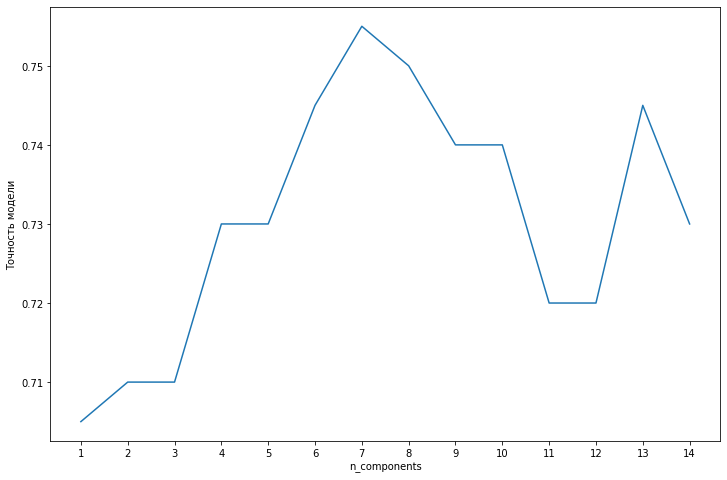

In [13]:
arr = []
for i in range(1, 15):
  classifier = RandomForestClassifier(max_depth = i, random_state = 0)
  classifier.fit(x_train, y_train)
  y_pred = classifier.predict(x_test)
  arr.append(accuracy_score(y_test, y_pred))
f = plt.figure(figsize = (12, 8))
plt.plot(range(1, 15), arr)
plt.xticks(range(1, 15))
plt.xlabel('n_components', fontsize = 10)
plt.ylabel('Точность модели', fontsize = 10)
plt.show()